In [0]:
from fastai.collab import *
from fastai.tabular import *

## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [0]:
user,item,title = 'userId','movieId','title'

In [3]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [5]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all we need to create and train a model:

In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [9]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.624368,0.948985,00:01
1,0.830565,0.671914,00:00
2,0.641099,0.661029,00:00


## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [10]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2020-02-28 17:59:18--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  12.6MB/s    in 0.4s    

2020-02-28 17:59:19 (12.6 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [11]:
Config.data_path()

PosixPath('/root/.fastai/data')

In [0]:
!cp /content/ml-100k.zip /root/.fastai/data/

In [13]:
!unzip /root/.fastai/data/ml-100k.zip

Archive:  /root/.fastai/data/ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base         
  inflating: ml-100k/u2.test         
  inflating: ml-100k/u3.base         
  inflating: ml-100k/u3.test         
  inflating: ml-100k/u4.base         
  inflating: ml-100k/u4.test         
  inflating: ml-100k/u5.base         
  inflating: ml-100k/u5.test         
  inflating: ml-100k/ua.base         
  inflating: ml-100k/ua.test         
  inflating: ml-100k/ub.base         
  inflating: ml-100k/ub.test         


In [0]:
!cp -r  /content/ml-100k/  /root/.fastai/data/

In [15]:
!ls -ltr /root/.fastai/data/

total 4872
drwxrwxr-x 2 1000 1000    4096 Sep 30  2018 movie_lens_sample
-rw-r--r-- 1 root root   51790 Feb 28 17:58 movie_lens_sample.tgz
-rw-r--r-- 1 root root 4924029 Feb 28 17:59 ml-100k.zip
drwxr-x--- 2 root root    4096 Feb 28 17:59 ml-100k


In [0]:
path=Config.data_path()/'ml-100k'

In [17]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [18]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [19]:
len(ratings)

100000

In [20]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [22]:
data.show_batch()

userId,title,target
709,Pulp Fiction (1994),5.0
117,Trainspotting (1996),5.0
58,"Shining, The (1980)",3.0
27,"People vs. Larry Flynt, The (1996)",3.0
535,Miller's Crossing (1990),5.0


In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


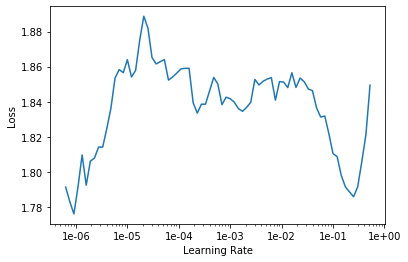

In [25]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [26]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.938744,0.948428,00:09
1,0.870873,0.884275,00:09
2,0.766310,0.837321,00:09
3,0.634033,0.812258,00:09
4,0.552259,0.810644,00:09


In [0]:
learn.save('dotprod')

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

### Setup

In [0]:
learn.load('dotprod');

In [29]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [30]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

### Movie bias

In [31]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [34]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3569),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3208),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.3105), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2800), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2582), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2498), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2497), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2488), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2485), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2253), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2218), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2141), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2096), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2091), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2022), 'Anac

In [35]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6114), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5762), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5738), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5630), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5337), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5279), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5098), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5091), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4980), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4925), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4832), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4802), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4709), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4608), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4597), 'Usual Suspects, The (1995)', 4.385767790262173)]

### Movie weights

In [36]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [37]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [39]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2774), 'Leave It to Beaver (1997)'),
 (tensor(1.2687), 'Home Alone 3 (1997)'),
 (tensor(1.2461), "McHale's Navy (1997)"),
 (tensor(1.1927), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1702), 'Congo (1995)'),
 (tensor(1.1674), 'Free Willy 3: The Rescue (1997)'),
 (tensor(1.1580), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.1566), 'Jungle2Jungle (1997)'),
 (tensor(1.0705), 'Mortal Kombat: Annihilation (1997)'),
 (tensor(1.0620), 'Flipper (1996)')]

In [40]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.0933), 'Casablanca (1942)'),
 (tensor(-1.0687), 'Close Shave, A (1995)'),
 (tensor(-1.0147), 'Chinatown (1974)'),
 (tensor(-1.0051), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0017), 'Third Man, The (1949)'),
 (tensor(-0.9625), 'Usual Suspects, The (1995)'),
 (tensor(-0.9565), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(-0.9482), 'Lawrence of Arabia (1962)'),
 (tensor(-0.9479), 'When We Were Kings (1996)'),
 (tensor(-0.9307),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [42]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.8942), 'Trainspotting (1996)'),
 (tensor(0.8335), 'Clockwork Orange, A (1971)'),
 (tensor(0.8116), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.7688), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.7628), 'Stupids, The (1996)'),
 (tensor(0.7582), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.7571), 'Keys to Tulsa (1997)'),
 (tensor(0.7512), 'Very Brady Sequel, A (1996)'),
 (tensor(0.7455), 'Dead Man (1995)'),
 (tensor(0.7376), 'Serial Mom (1994)')]

In [43]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2094), 'Braveheart (1995)'),
 (tensor(-1.1242), 'Titanic (1997)'),
 (tensor(-0.9798), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.9147), 'Forrest Gump (1994)'),
 (tensor(-0.8915), 'Field of Dreams (1989)'),
 (tensor(-0.8643), 'Pretty Woman (1990)'),
 (tensor(-0.8602), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8372), "Mr. Holland's Opus (1995)"),
 (tensor(-0.8317), 'Air Force One (1997)'),
 (tensor(-0.8227), 'American President, The (1995)')]

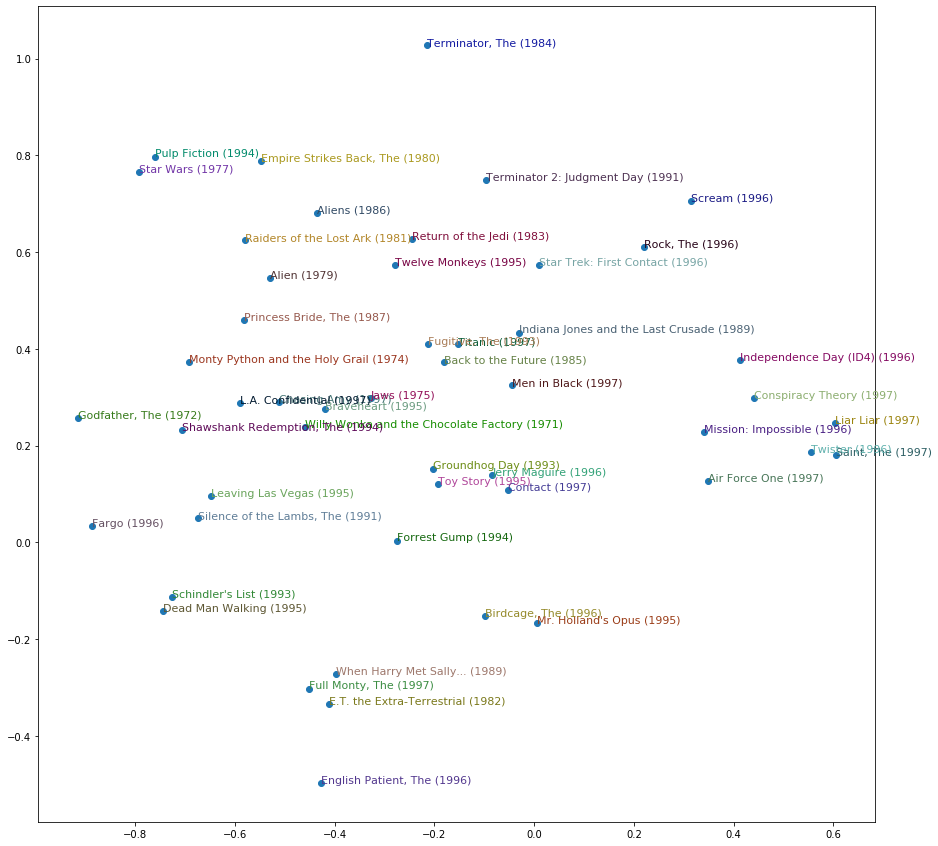

In [44]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()